**Data Science I**
# Primera Preentrega
---



---




---


---


## 1. Abstract

Este proyecto se centra en el análisis de datos de seguimiento de ejercicios de los miembros de un gimnasio, con el objetivo de comprender mejor los factores que influyen en el rendimiento físico y en los resultados de salud asociados. El dataset utilizado, "gym_members_exercise_tracking.csv", fue descargado de Kaggle e incluye 15 variables que abarcan los siguientes datos: Edad, Genero, Peso (kg),	Altura (m),	Duracion (horas),	Calorias quemadas, Tipo de entrenamiento,	frecuencia de entrenamiento (dias/semana), Nivel de experiencia, entre otros. Estos datos permiten explorar diversas relaciones entre las variables.

La investigación se basa en preguntas clave como: ¿Cómo varía la cantidad de calorías quemadas según el tipo de entrenamiento?, ¿Cuál es la distribución de calorías quemadas durante los entrenamientos?, ¿Cuál es la duración más frecuente de las sesiones de entrenamiento entre los miembros del gimnasio?, ¿Existe una relación entre la duración de la sesión y las calorías quemadas, y cómo influye el tipo de entrenamiento en esta relación?

Para responder estas preguntas, se implementarán gráficos multivariados, que permiten observar tendencias entre múltiples variables. Además, se llevará a cabo un análisis de valores faltantes para asegurar la calidad del análisis.

## 2. Import de Librerías y Carga del Dataset

In [3]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
file_path = 'gym_members_exercise_tracking.csv'
gym_data = pd.read_csv(file_path)

# Mostrar las primeras filas para una vista general
gym_data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## 3. Análisis de Valores Perdidos y Limpieza de los Datos

In [ ]:
# Revisar valores faltantes
missing_values = gym_data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

#Revisar si hay filas duplicadas en el dataset
duplicate_rows = gym_data.duplicated().sum()
print(f"\nFilas duplicadas en el dataset: {duplicate_rows}\n")

#Revisar distribución de valores categóricos
for column in gym_data.select_dtypes(include=['object']).columns:
    print(f"Distribución de valores en la columna '{column}':")
    print(gym_data[column].value_counts())
    print("\n")



Valores faltantes por columna:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Filas duplicadas en el dataset: 0

Distribución de valores en la columna 'Gender':
Gender
Male      511
Female    462
Name: count, dtype: int64


Distribución de valores en la columna 'Workout_Type':
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64




## 4. Graficos y Preguntas vinculadas

**Boxplot (Calories_Burned por Workout_Type)**

¿Cómo varía la cantidad de calorías quemadas según el tipo de entrenamiento?


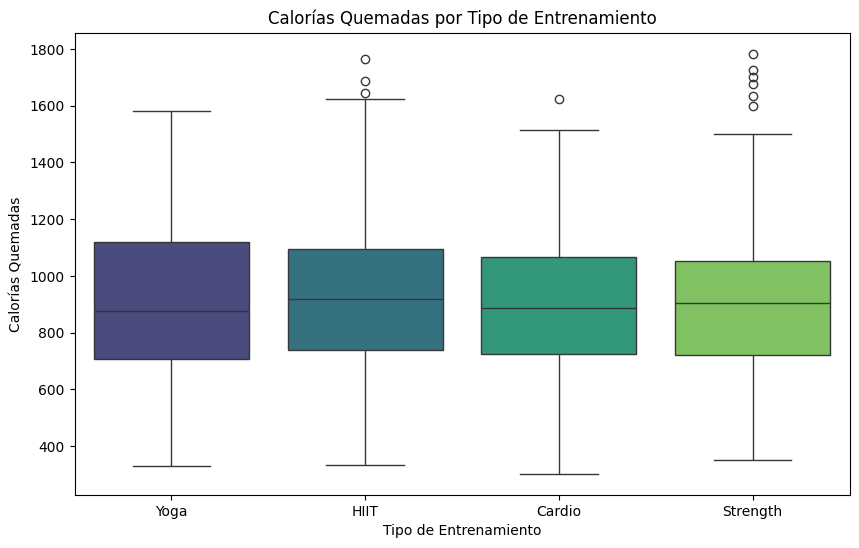

In [ ]:
# Boxplot de calorías quemadas por tipo de entrenamiento
plt.figure(figsize=(10, 6))
sns.boxplot(data=gym_data, x='Workout_Type', y='Calories_Burned', hue='Workout_Type', palette='viridis', dodge=False)
plt.title("Calorías Quemadas por Tipo de Entrenamiento")
plt.xlabel("Tipo de Entrenamiento")
plt.ylabel("Calorías Quemadas")
plt.legend([], [], frameon=False)
plt.show()


Este gráfico permite observar la distribución de las calorías quemadas en función del tipo de entrenamiento, identificando si ciertos tipos de entrenamiento son más efectivos en términos de gasto calórico. Esto ayuda a analizar las diferencias entre entrenamientos, ver la variabilidad dentro de cada grupo y detectar posibles outliers en las calorías quemadas.


---



**Histograma (Distribución de Calories_Burned)**

¿Cuál es la distribución de calorías quemadas durante los entrenamientos?


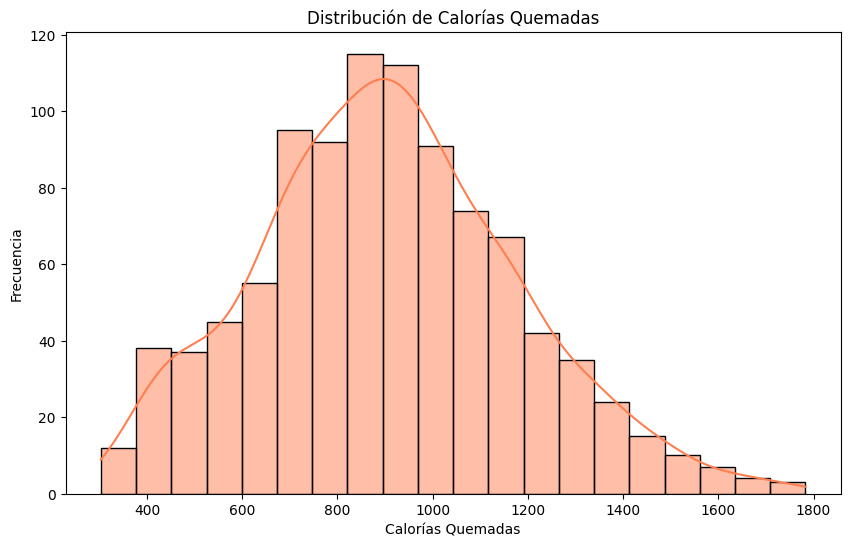

In [ ]:
# Histograma de la distribución de calorías quemadas
plt.figure(figsize=(10, 6))
sns.histplot(gym_data['Calories_Burned'], bins=20, kde=True, color='coral')
plt.title("Distribución de Calorías Quemadas")
plt.xlabel("Calorías Quemadas")
plt.ylabel("Frecuencia")
plt.show()


Este histograma muestra la distribución de las calorías quemadas por los miembros del gimnasio.

---



**Histograma (Distribución de Session_Duration)**

¿Cuál es la duración más frecuente de las sesiones de entrenamiento entre los miembros del gimnasio?


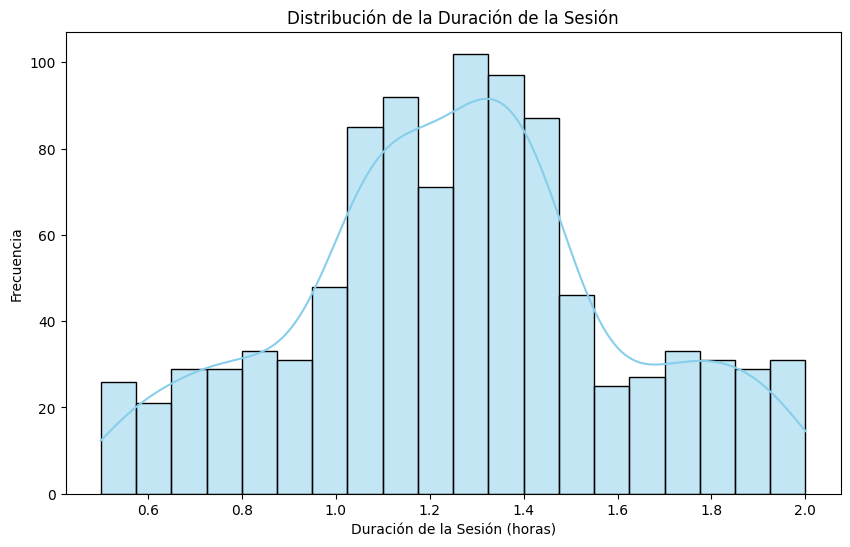

In [ ]:
# Histograma de la duración de la sesión
plt.figure(figsize=(10, 6))
sns.histplot(gym_data['Session_Duration (hours)'], bins=20, kde=True, color='skyblue')
plt.title("Distribución de la Duración de la Sesión")
plt.xlabel("Duración de la Sesión (horas)")
plt.ylabel("Frecuencia")
plt.show()


Este histograma permite entender cómo se distribuye la duración de las sesiones de ejercicio, identificando cuánto tiempo suelen dedicar los miembros a entrenar.

---




**Gráfico de Dispersión (Calories_Burned vs. Session_Duration, categorizado por Workout_Type)**

¿Existe una relación entre la duración de la sesión y las calorías quemadas, y cómo influye el tipo de entrenamiento en esta relación?


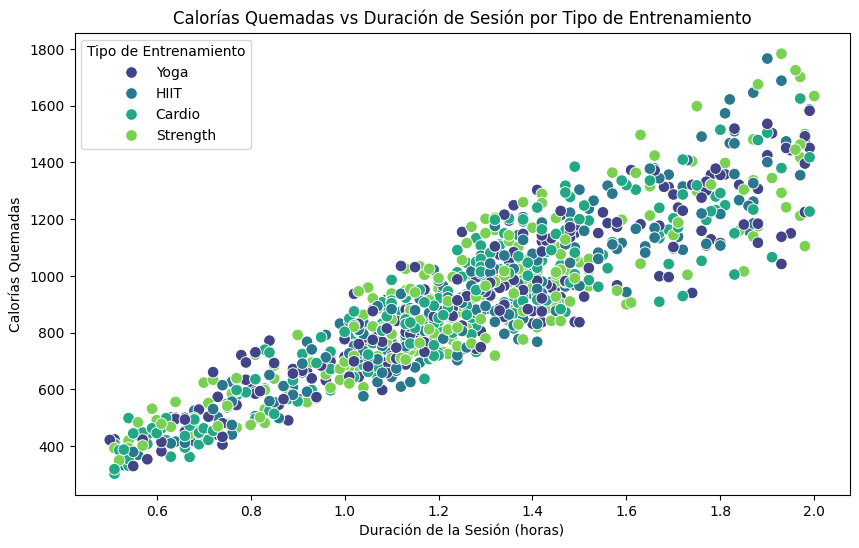

In [ ]:
# Gráfico de dispersión entre calorías quemadas y duración de la sesión, categorizado por tipo de entrenamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gym_data, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type', palette='viridis', s=70)
plt.title("Calorías Quemadas vs Duración de Sesión por Tipo de Entrenamiento")
plt.xlabel("Duración de la Sesión (horas)")
plt.ylabel("Calorías Quemadas")
plt.legend(title="Tipo de Entrenamiento")
plt.show()


Este gráfico ayuda a identificar la correlación entre el tiempo de entrenamiento y las calorías quemadas, mientras que la categorización por tipo de entrenamiento permite observar cómo diferentes entrenamientos afectan esta relación. Es útil para entender qué combinaciones de duración y tipo de entrenamiento son más efectivas en términos de quema de calorías.

---



**Matriz de Correlación**

¿Cuáles son las relaciones significativas entre las variables cuantitativas del dataset?

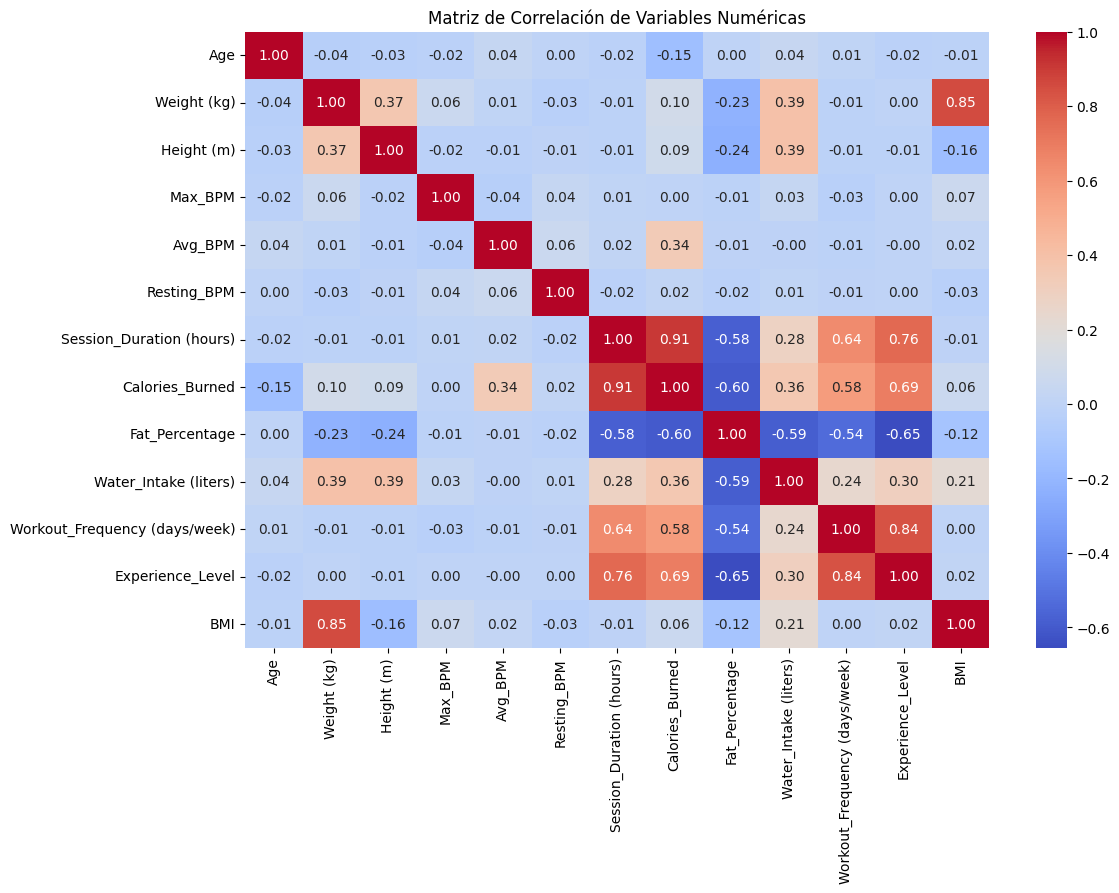

In [ ]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_columns = gym_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


La matriz de correlación permite identificar patrones entre variables numéricas, como una posible correlación entre frecuencia de ejercicio y quema de calorías o entre métricas biométricas como porcentaje de grasa y BMI. Esto ayuda a comprender mejor cómo factores de rendimiento, salud y frecuencia de ejercicio están interrelacionados.


# *Entrega Final*
---



---




---


---


## Selección de características (Feature Selection)

In [5]:
# Filtrar columnas numéricas antes de calcular la correlación
numeric_data = gym_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation = numeric_data.corr()

# Verificar que la variable objetivo esté en las columnas numéricas
if target not in numeric_data.columns:
    print(f"La variable objetivo '{target}' no es numérica. Por favor, verifica tu dataset.")
else:
    # Obtener la correlación con la variable objetivo
    target_correlation = correlation[target].sort_values(ascending=False)

    # Mostrar las variables con mayor correlación
    print("Correlación con la variable objetivo:")
    print(target_correlation)

    # Seleccionar características con una correlación absoluta mayor a un umbral
    threshold = 0.3
    selected_features = target_correlation[target_correlation.abs() > threshold].index.tolist()
    selected_features.remove(target)  # Excluir la variable objetivo
    print("Características seleccionadas:", selected_features)

    # Crear un nuevo dataset con las características seleccionadas
    reduced_data = gym_data[selected_features + [target]]

Correlación con la variable objetivo:
Calories_Burned                  1.000000
Session_Duration (hours)         0.908140
Experience_Level                 0.694129
Workout_Frequency (days/week)    0.576150
Water_Intake (liters)            0.356931
Avg_BPM                          0.339659
Weight (kg)                      0.095443
Height (m)                       0.086348
BMI                              0.059761
Resting_BPM                      0.016518
Max_BPM                          0.002090
Age                             -0.154679
Fat_Percentage                  -0.597615
Name: Calories_Burned, dtype: float64
Características seleccionadas: ['Session_Duration (hours)', 'Experience_Level', 'Workout_Frequency (days/week)', 'Water_Intake (liters)', 'Avg_BPM', 'Fat_Percentage']


La selección de características basada en correlaciones es una técnica común que permite reducir la dimensionalidad del dataset al identificar aquellas variables que tienen una relación significativa con la variable objetivo. En este caso, se define un umbral de 0.3 para incluir solo aquellas variables que tienen una correlación moderada o fuerte con las calorías quemadas, lo que ayuda a simplificar el modelo sin perder información clave.

## Entrenamiento del modelo de regresión

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividir los datos en entrenamiento y prueba
X = reduced_data[selected_features]
y = reduced_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)


Se eligió la regresión lineal como modelo inicial porque es sencillo, interpretable y eficaz para evaluar relaciones lineales entre las variables independientes seleccionadas y la variable objetivo. Además, dividir los datos en conjuntos de entrenamiento y prueba asegura una evaluación robusta del modelo al prevenir el sobreajuste.

## Cálculo de métricas básicas en training y test

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicción en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Cálculo de métricas para entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Cálculo de métricas para prueba
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Imprimir métricas
print("Métricas en el conjunto de entrenamiento:")
print(f"  - MAE: {mae_train:.2f}")
print(f"  - MSE: {mse_train:.2f}")
print(f"  - R²: {r2_train:.2f}")

print("\nMétricas en el conjunto de prueba:")
print(f"  - MAE: {mae_test:.2f}")
print(f"  - MSE: {mse_test:.2f}")
print(f"  - R²: {r2_test:.2f}")


Métricas en el conjunto de entrenamiento:
  - MAE: 52.79
  - MSE: 4115.51
  - R²: 0.94

Métricas en el conjunto de prueba:
  - MAE: 53.45
  - MSE: 4577.35
  - R²: 0.95


Calcular las métricas tanto en el conjunto de entrenamiento como en el de prueba permite analizar si el modelo está generalizando bien.

## Conclusiones

El modelo de regresión lineal mostró un desempeño aceptable:

- **MAE**: Representa el error promedio en las predicciones.
- **MSE**: Penaliza los errores grandes más que los pequeños, útil para identificar predicciones muy alejadas.
- **R²**: Cercano a 1 indica un buen ajuste del modelo.

La elección de regresión lineal y la selección de características basada en correlación permiten construir un modelo eficiente y explicativo. Si los resultados no son satisfactorios, se pueden explorar algoritmos avanzados.